In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/RL_Finta/

/content/drive/MyDrive/RL_Finta


In [3]:
!nvidia-smi

Wed Dec 28 22:04:38 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P0    29W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
!apt-get update && apt-get install ffmpeg freeglut3-dev xvfb  # For visualisation
!pip install stable-baselines3[extra] gym-anytrading gym

Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:2 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:3 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:4 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic/main Sources [2,235 kB]
Get:10 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic/main amd64 Packages [1,143 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Ign:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:13 https://developer.download.nvid

In [8]:
import gym, gym_anytrading

# Stable baselines - rl
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

# Processing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Import Marketwatch GME Data**

In [9]:
df = pd.read_csv('STOCK_US_XNYS_GME.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,12/23/2022,20.00,20.63,19.65,20.08,"3,174,827"
1,12/22/2022,20.50,20.50,18.50,19.81,"5,343,087"
2,12/21/2022,20.40,20.90,20.18,20.56,"2,793,559"
3,12/20/2022,19.86,21.32,19.62,20.26,"4,478,987"
4,12/19/2022,20.55,20.89,19.59,19.92,"3,700,556"


In [10]:
df.sort_values('Date', ascending=True, inplace=True)
df.head()

,Date,Open,High,Low,Close,Volume
241,1/10/2022,33.75,33.92,30.00,32.79,"22,047,924"
240,1/11/2022,32.53,34.20,31.85,32.58,"10,332,220"
239,1/12/2022,32.50,32.83,31.61,32.02,"6,298,036"
238,1/13/2022,32.13,32.63,30.42,30.62,"8,901,080"
237,1/14/2022,30.04,30.58,28.01,29.16,"15,401,912"


In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [12]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-10,33.75,33.92,30.00,32.79,"22,047,924"
2022-01-11,32.53,34.20,31.85,32.58,"10,332,220"
2022-01-12,32.50,32.83,31.61,32.02,"6,298,036"
2022-01-13,32.13,32.63,30.42,30.62,"8,901,080"
2022-01-14,30.04,30.58,28.01,29.16,"15,401,912"


In [13]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,240), window_size=5)

/usr/local/lib/python3.8/dist-packages/gym/utils/passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 2)
/usr/local/lib/python3.8/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  class ObservationWrapper(Wrapper):
/usr/local/lib/python3.8/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.


In [14]:
env.signal_features

array([[ 3.279e+01,  0.000e+00],
       [ 3.258e+01, -2.100e-01],
       [ 3.202e+01, -5.600e-01],
       [ 3.062e+01, -1.400e+00],
       [ 2.916e+01, -1.460e+00],
       [ 2.723e+01, -1.930e+00],
       [ 2.664e+01, -5.900e-01],
       [ 2.567e+01, -9.700e-01],
       [ 2.659e+01,  9.200e-01],
       [ 2.504e+01, -1.550e+00],
       [ 2.495e+01, -9.000e-02],
       [ 2.582e+01,  8.700e-01],
       [ 2.338e+01, -2.440e+00],
       [ 2.448e+01,  1.100e+00],
       [ 3.821e+01,  1.373e+01],
       [ 2.723e+01, -1.098e+01],
       [ 3.723e+01,  1.000e+01],
       [ 3.234e+01, -4.890e+00],
       [ 3.276e+01,  4.200e-01],
       [ 3.516e+01,  2.400e+00],
       [ 2.500e+01, -1.016e+01],
       [ 2.527e+01,  2.700e-01],
       [ 2.536e+01,  9.000e-02],
       [ 2.556e+01,  2.000e-01],
       [ 2.463e+01, -9.300e-01],
       [ 2.596e+01,  1.330e+00],
       [ 2.667e+01,  7.100e-01],
       [ 2.454e+01, -2.130e+00],
       [ 2.441e+01, -1.300e-01],
       [ 2.530e+01,  8.900e-01],
       [ 2

**Build Environment**

In [15]:
env.action_space

Discrete(2)

/usr/local/lib/python3.8/dist-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
/usr/local/lib/python3.8/dist-packages/gym/utils/passive_env_checker.py:190: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting.
/usr/local/lib/python3.8/dist-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
/usr/local/lib/python3.8/dist-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 


info {'total_reward': 5.070000000000025, 'total_profit': 0.47673136940759403, 'position': 0}


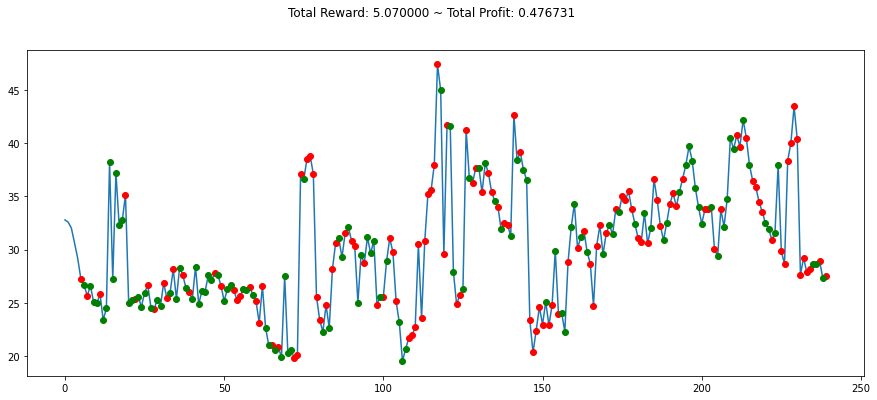

In [16]:
state = env.reset()
while True:
    action = env.action_space.sample()
    state, reward, done, info = env.step(action)
    if done:
        print("info", info)
        break

plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [17]:
!pip install finta # finta - financial technical analysis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
from finta import TA
from gym_anytrading.envs import StocksEnv

In [19]:
# Fix Volume Column from Object (string) to float (number)
df['Volume'] = df['Volume'].astype(str)
df['Volume'] = df['Volume'].apply(lambda x: float(x.replace(",", "")))

In [20]:
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

Calculate SMA, RSI and OBV

In [21]:
df['SMA'] = TA.SMA(df, 12) # 12 period simple moving average
df['RSI'] = TA.RSI(df)
df['OBV'] = TA.OBV(df)
df.head()

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Date,,,,,,,,
2022-01-10,33.75,33.92,30.00,32.79,22047924.0,NaN,NaN,NaN
2022-01-11,32.53,34.20,31.85,32.58,10332220.0,NaN,0.0,-10332220.0
2022-01-12,32.50,32.83,31.61,32.02,6298036.0,NaN,0.0,-16630256.0
2022-01-13,32.13,32.63,30.42,30.62,8901080.0,NaN,0.0,-25531336.0
2022-01-14,30.04,30.58,28.01,29.16,15401912.0,NaN,0.0,-40933248.0


In [22]:
df.fillna(0, inplace=True)
df.head(15)

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Date,,,,,,,,
2022-01-10,33.75,33.92,30.00,32.79,22047924.0,0.000000,0.000000,0.0
2022-01-11,32.53,34.20,31.85,32.58,10332220.0,0.000000,0.000000,-10332220.0
2022-01-12,32.50,32.83,31.61,32.02,6298036.0,0.000000,0.000000,-16630256.0
2022-01-13,32.13,32.63,30.42,30.62,8901080.0,0.000000,0.000000,-25531336.0
2022-01-14,30.04,30.58,28.01,29.16,15401912.0,0.000000,0.000000,-40933248.0
2022-01-18,28.28,28.44,26.10,27.23,15037612.0,0.000000,0.000000,-55970860.0
2022-01-19,27.50,28.26,26.10,26.64,9614316.0,0.000000,0.000000,-65585176.0
2022-01-20,26.98,28.80,25.40,25.67,11680296.0,0.000000,0.000000,-77265472.0
2022-01-21,25.25,27.55,23.18,26.59,22120044.0,0.000000,14.351087,-55145428.0


**Create New Environment**

In [25]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low', 'Volume', 'SMA', 'RSI', 'OBV']].to_numpy()[start:end]
    return prices, signal_features

In [27]:
class MyCustomEnv(StocksEnv):
    _process_data = add_signals

env2 = MyCustomEnv(df=df, window_size=12, frame_bound=(12, 50))

In [29]:
env2.prices

array([30.  , 31.85, 31.61, 30.42, 28.01, 26.1 , 26.1 , 25.4 , 23.18,
       21.57, 23.75, 25.08, 23.22, 21.9 , 37.3 , 24.47, 35.76, 32.29,
       30.29, 33.13, 24.75, 23.95, 25.27, 23.91, 24.63, 25.24, 26.13,
       24.27, 24.07, 24.1 , 24.11, 24.8 , 25.32, 25.2 , 26.42, 24.21,
       27.91, 25.95, 25.43, 25.8 , 24.42, 27.62, 23.91, 24.15, 25.61,
       26.27, 26.37, 26.15, 26.83, 26.5 ])

In [30]:
df.head()

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Date,,,,,,,,
2022-01-10,33.75,33.92,30.00,32.79,22047924.0,0.0,0.0,0.0
2022-01-11,32.53,34.20,31.85,32.58,10332220.0,0.0,0.0,-10332220.0
2022-01-12,32.50,32.83,31.61,32.02,6298036.0,0.0,0.0,-16630256.0
2022-01-13,32.13,32.63,30.42,30.62,8901080.0,0.0,0.0,-25531336.0
2022-01-14,30.04,30.58,28.01,29.16,15401912.0,0.0,0.0,-40933248.0


**Build Environment and Train**

In [31]:
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

In [35]:
model = A2C('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=1000000)

Streaming output truncated to the last 5000 lines.
|    value_loss         | 86.2     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 392      |
|    iterations         | 1700     |
|    time_elapsed       | 21       |
|    total_timesteps    | 8500     |
| train/                |          |
|    entropy_loss       | -0.0446  |
|    explained_variance | 0.93     |
|    learning_rate      | 0.0007   |
|    n_updates          | 1699     |
|    policy_loss        | 0.000849 |
|    value_loss         | 0.0272   |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 395      |
|    iterations         | 1800     |
|    time_elapsed       | 22       |
|    total_timesteps    | 9000     |
| train/                |          |
|    entropy_loss       | -0.0895  |
|    explained_variance | 0.608    |
|    learning_rate      

KeyboardInterrupt: ignored

**Evaluation**

In [46]:
env = MyCustomEnv(df=df, window_size=12, frame_bound=(200, 240))
obs = env.reset()
while True:
    obs = obs[np.newaxis, ...]
    action, states = model.predict(obs)
    obs, reward, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 0.0, 'total_profit': 0.8325142723880598, 'position': 1}


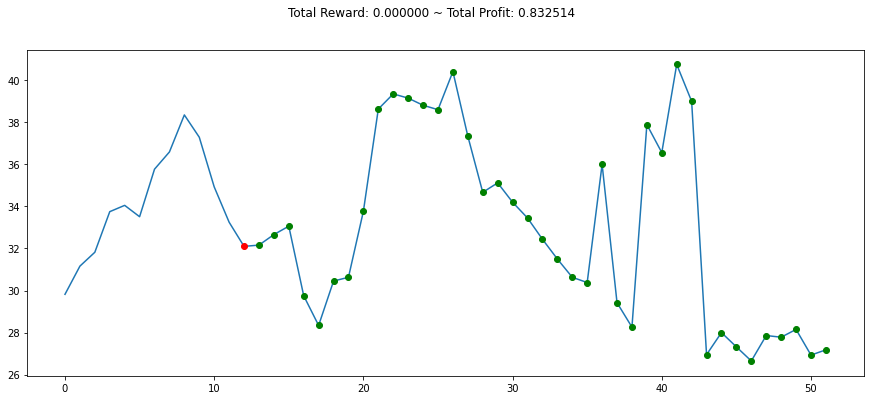

In [47]:
plt.figure(figsize=(15, 6))
env.render_all()